# Introducción al paquete Scipy  <a class="tocSkip">

El paquete **Scipy** es una colección de algoritmos y funciones construida sobre **Numpy** para facilitar cálculos y actividades relacionadas con el trabajo técnico/científico. 


## Una mirada rápida a Scipy

La ayuda de scipy contiene (con `help(scipy)` entre otras cosas)


    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import.  For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fftpack                      --- Discrete Fourier Transform algorithms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     linalg.lapack                --- Wrappers to LAPACK library
     misc                         --- Various utilities that don't have
                                      another home.
     ndimage                      --- n-dimensional image package
     odr                          --- Orthogonal Distance Regression
     optimize                     --- Optimization Tools
     signal                       --- Signal Processing Tools
     sparse                       --- Sparse Matrices
     sparse.linalg                --- Sparse Linear Algebra
     sparse.linalg.dsolve         --- Linear Solvers
     sparse.linalg.dsolve.umfpack --- :Interface to the UMFPACK library:
                                      Conjugate Gradient Method (LOBPCG)
     sparse.linalg.eigen          --- Sparse Eigenvalue Solvers
     sparse.linalg.eigen.lobpcg   --- Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG)
     spatial                      --- Spatial data structures and algorithms
     special                      --- Special functions
     stats                        --- Statistical Functions
     

Más información puede encontrarse en la [documentación oficial de Scipy](https://docs.scipy.org/doc/scipy/reference)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Funciones especiales

En el submódulo `scipy.special` están definidas un número de funciones especiales. Una lista general de las funciones definidas (De cada tipo hay varias funciones) es:

-  Airy functions
-  Elliptic Functions and Integrals
-  Bessel Functions
-  Struve Functions
-  Raw Statistical Functions
-  Information Theory Functions
-  Gamma and Related Functions
-  Error Function and Fresnel Integrals
-  Legendre Functions
-  Ellipsoidal Harmonics
-  Orthogonal polynomials
-  Hypergeometric Functions
-  Parabolic Cylinder Functions
-  Mathieu and Related Functions
-  Spheroidal Wave Functions
-  Kelvin Functions
-  Combinatorics
-  Other Special Functions
-  Convenience Functions



In [2]:
from scipy import special

### Funciones de Bessel

Las funciones de Bessel son soluciones de la ecuación diferencial:

$$ x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - \nu^2)y = 0 . $$

Para valores enteros de $\nu$ se trata de una familia de funciones que aparecen como soluciones de problemas de propagación de ondas en problemas con simetría cilíndrica. 


In [3]:
np.info(special.jv)

jv(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

jv(v, z)

Bessel function of the first kind of real order and complex argument.

Parameters
----------
v : array_like
    Order (float).
z : array_like
    Argument (float or complex).

Returns
-------
J : ndarray
    Value of the Bessel function, :math:`J_v(z)`.

Notes
-----
For positive `v` values, the computation is carried out using the AMOS
[1]_ `zbesj` routine, which exploits the connection to the modified
Bessel function :math:`I_v`,

.. math::
    J_v(z) = \exp(v\pi\imath/2) I_v(-\imath z)\qquad (\Im z > 0)

    J_v(z) = \exp(-v\pi\imath/2) I_v(\imath z)\qquad (\Im z < 0)

For negative `v` values the formula,

.. math:: J_{-v}(z) = J_v(z) \cos(\pi v) - Y_v(z) \sin(\pi v)

is used, where :math:`Y_v(z)` is the Bessel function of the second
kind, computed using the AMOS routine `zbesy`.  Note that the second
term is exactly zero for integer `v`; to improve accuracy 

In [4]:
np.info(special.jn_zeros)

 jn_zeros(n, nt)

Compute zeros of integer-order Bessel functions Jn.

Compute `nt` zeros of the Bessel functions :math:`J_n(x)` on the
interval :math:`(0, \infty)`. The zeros are returned in ascending
order. Note that this interval excludes the zero at :math:`x = 0`
that exists for :math:`n > 0`.

Parameters
----------
n : int
    Order of Bessel function
nt : int
    Number of zeros to return

Returns
-------
ndarray
    First `n` zeros of the Bessel function.

See Also
--------
jv

References
----------
.. [1] Zhang, Shanjie and Jin, Jianming. "Computation of Special
       Functions", John Wiley and Sons, 1996, chapter 5.
       https://people.sc.fsu.edu/~jburkardt/f_src/special_functions/special_functions.html

Examples
--------
>>> import scipy.special as sc

We can check that we are getting approximations of the zeros by
evaluating them with `jv`.

>>> n = 1
>>> x = sc.jn_zeros(n, 3)
>>> x
array([ 3.83170597,  7.01558667, 10.17346814])
>>> sc.jv(n, x)
array([-0.00000000e+00,  1.

In [5]:
# Ceros de la función de Bessel
# Los tres primeros valores de x en los cuales se anula la función de Bessel de orden 4.
special.jn_zeros(4,3)

array([ 7.58834243, 11.06470949, 14.37253667])

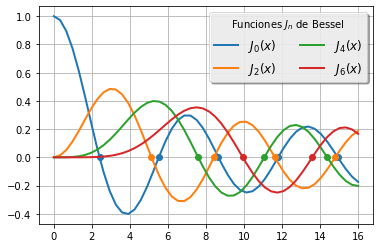

In [6]:
x = np.linspace(0, 16, 50)
for n in range(0,8,2):
  p= plt.plot(x, special.jn(n, x), label='$J_{}(x)$'.format(n))
  z = special.jn_zeros(n, 6)
  z = z[z < 15]
  plt.plot(z, np.zeros(z.size), 'o', color= p[0].get_color())

plt.legend(title='Funciones $J_n$ de Bessel', ncol=2);
plt.grid(True)

In [7]:
# jn es otro nombre para jv
print(special.jn == special.jv)
print(special.jn is special.jv)

True
True


Como vemos, hay funciones para calcular funciones de Bessel. Aquí mostramos los órdenes enteros pero también se pueden utilizar órdenes $\nu$ reales. La lista de funciones de Bessel (puede obtenerse de la ayuda sobre `scipy.special`) es:

 - Bessel Functions
 - Zeros of Bessel Functions
 - Faster versions of common Bessel Functions
 - Integrals of Bessel Functions
 - Derivatives of Bessel Functions
 - Spherical Bessel Functions
 - Riccati-Bessel Functions

Por ejemplo, podemos calcular las funciones esféricas de Bessel, que aparecen en problemas con simetría esférica:

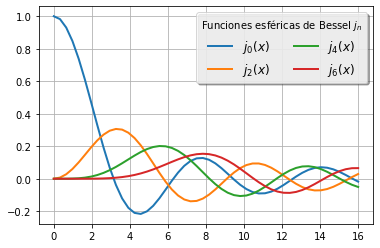

In [8]:
x = np.linspace(0, 16, 50)
for n in range(0,7,2):
  p= plt.plot(x, special.spherical_jn(n, x), label='$j_{}(x)$'.format(n))
plt.legend(title='Funciones esféricas de Bessel $j_n$', ncol=2);
plt.grid(True)

### Función Error

La función error es el resultado de integrar una función Gaussiana

$$ \operatorname{erf}z=\frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-t^{2}}\mathrm{d}t, $$

mientras que las integrales seno y coseno de Fresnel están definidas por:
$$
\operatorname{ssa}= \int_{0}^{z} \sin(\pi/2  t^2) \mathrm{d} t \\
\operatorname{csa}= \int_{0}^{z} \cos(\pi/2  t^2) \mathrm{d} t 
$$

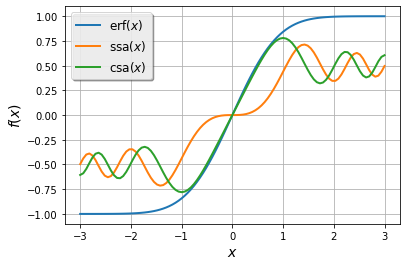

In [9]:
x = np.linspace(-3, 3,100)
f = special.fresnel(x)
plt.plot(x, special.erf(x),'-', label=r'$\mathrm{erf}(x)$')
plt.plot(x, f[0],'-', label=r'$\mathrm{ssa}(x)$')
plt.plot(x, f[1],'-', label=r'$\mathrm{csa}(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
plt.grid(True)

### Evaluación de polinomios ortogonales

`Scipy.special` tiene funciones para evaluar eficientemente polinomios ortogonales

Por ejemplo si queremos, evaluar los polinomios de Laguerre, solución de la ecuación diferencial:
$$
x\frac{d^2}{dx^2}L_n + (1 - x)\frac{d}{dx}L_n + nL_n = 0
$$

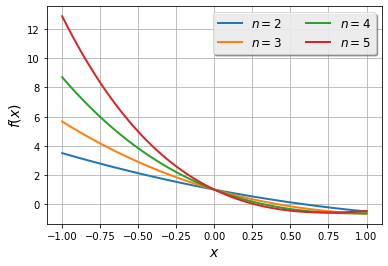

In [10]:
x = np.linspace(-1, 1,100)
for n in range(2,6):
  plt.plot(x, special.eval_laguerre(n, x),'-', label=r'$n={}$'.format(n))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best', ncol=2)
plt.grid(True)

Los polinomios de Chebyshev son solución de
$$ (1 - x^2)\frac{d^2}{dx^2}T_n - x\frac{d}{dx}T_n + n^2T_n = 0$$

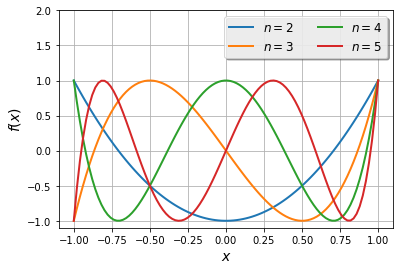

In [11]:
x = np.linspace(-1, 1,100)
for n in range(2,6):
  plt.plot(x, special.eval_chebyt(n, x),'-', label=f'$n={n}$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best', ncol=2)
plt.ylim((-1.1,2))
plt.grid(True)

### Factorial, permutaciones y combinaciones

Hay funciones para calcular varias funciones relacionadas con combinatoria

La función `comb()` da el número de maneras de elegir `k` de un total de `N` elementos. Sin repeticiones está dada por:
$$ \frac{N!}{k! (N-k)!}$$
mientras que si cada elemento puede repetirse, la fórmula es:
$$ \frac{(N+k-1)!}{k! (N-1)!}$$


In [12]:
N = 10
k = np.arange(2,4)

In [13]:
special.comb(N, k)

array([ 45., 120.])

In [14]:
# Si usamos exact=True, k no puede ser un array
special.comb(N,3,exact=True)

120

In [15]:
special.comb(N,k, repetition=True)

array([ 55., 220.])

El número de permutaciones se obtiene con la función `perm()`, y está dado por:
$$ \frac{N!}{(N-k)!}$$

In [16]:
special.perm(N,k)

array([ 90., 720.])

que corresponde a:
$$ \frac{10!}{(10-3)!} = 10 \cdot 9 \cdot 8 $$


Los números factorial (N!) y doble factorial (N!!) son:

In [17]:
N = np.array([3,6,8])
print(f"{N}! = {special.factorial(N)}")
print(f"{N}!! = {special.factorial2(N)}")

[3 6 8]! = [6.000e+00 7.200e+02 4.032e+04]
[3 6 8]!! = [  3.  48. 384.]


## Integración numérica

Scipy tiene rutinas para integrar numéricamente funciones o tablas de datos. Por ejemplo para integrar funciones en la forma:
$$I= \int_{a}^{b} f(x)\, dx $$
la función más utilizada es `quad`, que llama a distintas rutinas del paquete **QUADPACK** dependiendo de los argumentos que toma. Entre los aspectos más notables está la posibilidad de elegir una función de peso entre un conjunto definido de funciones, y la posibilidad de elegir un dominio de integración finito o infinito.

In [18]:
from scipy import integrate

In [19]:
x = np.linspace(0., 10, 100)

In [20]:
def f1(x):
  return np.sin(x)*np.exp(-np.square(x+1)/10)

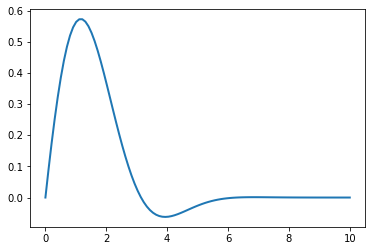

In [21]:
plt.plot(x,f1(x))

In [22]:
integrate.quad(f1,0,1)

(0.34858491873298725, 3.870070028144515e-15)

In [23]:
np.info(integrate.quad)

 quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08,
      limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50,
      limlst=50)

Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
    In the call forms with ``xx``,  ``n`` is the length of the ``xx``
    array wh

In [24]:
[((0, xmax), integrate.quad(f1,0,xmax)[0]) for xmax in np.arange(1,5)]

[((0, 1), 0.34858491873298725),
 ((0, 2), 0.8600106383901718),
 ((0, 3), 1.0438816972950689),
 ((0, 4), 1.0074874684274517)]

La rutina devuelve dos valores. El primero es la estimación del valor de la integral y el segundo una estimación del **error absoluto** . Además, la función acepta límites de integración infinitos ($\pm \infty$, definidos en **Numpy**)

In [25]:
integrate.quad(f1,-np.inf,np.inf)

(-0.3871487639489655, 5.4599545822826244e-09)

### Ejemplo de función fuertemente oscilatoria

In [26]:
k = 200
L = 2*np.pi
a = 0.1
def f2(x):
  return np.sin(k*x)*np.exp(-a*x)

In [27]:
# Valor exacto de la integral
I=k/a**2*(np.exp(-a*L)-1)/(1-k**2/a**2)
print(I)

0.0023325601276845158


In [28]:
Iq= integrate.quad(f2,0,L)

<ipython-input-28-909b8a42d90d>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Iq= integrate.quad(f2,0,L)


In [29]:
I_err = (I-Iq[0])/I             # Error relativo con el valor exacto
print("I= {:.5g} ± {:.5g}\nError relativo= {:.6g}\n".format(*Iq, I_err))

I= -0.0043611 ± 0.019119
Error relativo= 2.86965



El error relativo entre el valor obtenido numéricamente y el valor exacto `I` es grande. Esto se debe a la naturaleza del integrando. Grafiquemos sólo una pequeña parte

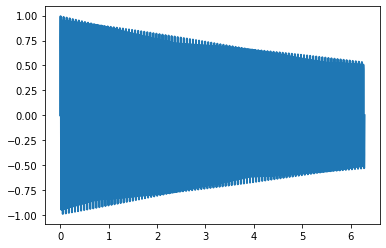

In [30]:
x = np.linspace(0,L,1500)
plt.plot(x, f2(x))

La rutina `quad` es versatil y tiene una opción específica para integrandos oscilatorios, que permite calcular las integrales de una función $f$ multiplicadas por una función oscilatoria
$$I= \int_{a}^{b} f(x)\,weight( w x)\, dx $$
Para ello debemos usar el argumento `weight` y `wvar`. En este caso usaremos `weight='sin'`

In [31]:
# La función sin el factor oscilatorio:
def f3(x):
  return np.exp(-a*x)

In [32]:
Is= integrate.quad(f3,0,L, weight='sin', wvar=k)

In [33]:
I_err = (I-Is[0])/I             # Error relativo con el valor exacto 
print("I= {:.5g} ± {:.5g}\nError relativo= {:.6g}\n".format(*Is, I_err))

I= 0.0023326 ± 1.1788e-33
Error relativo= 5e-07



Esto es así, porque una vez que separamos el comportamiento oscilatorio, la función es suave y fácilmente integrable

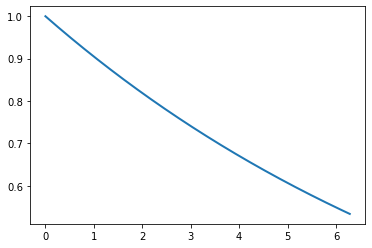

In [34]:
plt.plot(x, f3(x))

El error relativo obtenido respecto al valor exacto es varios órdenes de magnitud menor. Comparemos los tiempos de ejecución:

In [35]:
%timeit integrate.quad(f2,0,L)

<magic-timeit>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


3.34 ms ± 246 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit integrate.quad(f3,0,L, weight='sin', wvar=k)

24.8 µs ± 785 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Usar un integrador más específico para el integrando no sólo nos da un mejor resultado sino que el tiempo de ejecución es más de 100 veces más corto.

### Funciones de más de una variable

Consideremos el caso en que queremos integrar alguna función especial. Podemos usar Scipy para realizar la integración y para evaluar el integrando.  Como `special.jn` depende de dos variables, tenemos que crear una función intermedia que dependa sólo de la variable de integración

In [37]:
integrate.quad(lambda x: special.jn(0,x), 0 , 10)

(1.0670113039567362, 7.434789460651883e-14)

En realidad, la función `quad` permite el uso de argumentos que se le pasan a la función a integrar. La forma de llamar al integrador será en general:

```python
  quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08,
      limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50,
      limlst=50)
  ```

El argumento `args` debe ser una tupla, y contiene los argumentos extra que acepta la función a integrar, esta función debe llamarse en la forma `func(x, *args)`. O sea que siempre la integramos respecto a su primer argumento. Apliquemos esto a la función de Bessel. En este caso, la variable a integrar es el segundo argumento de `special.jn`, por lo que creamos una función con el orden correcto de argumentos:

In [38]:
def bessel_n(x, n):
  return special.jn(n,x)

In [39]:
integrate.quad(bessel_n, 0, 10, args=(0,))

(1.0670113039567362, 7.434789460651883e-14)

In [40]:
print('n    \int_0^10  J_n(x) dx')
for n in range(6):
  print(n,': ', integrate.quad(bessel_n, 0, 10, args=(n,))[0])

n    \int_0^10  J_n(x) dx
0 :  1.0670113039567362
1 :  1.2459357644513482
2 :  0.9800658116190144
3 :  0.7366751370811073
4 :  0.8633070530086401
5 :  1.1758805092851239



-------

**Nota:**

Para calcular integrales múltiples existen rutinas que hacen llamados sucesivos a la rutina `quad()`. Esto incluye rutinas para integrales dobles (rutina `dblquad()`), triples (rutina `tplquad()`) y en general n-dimensionales (rutina `nquad()`)

-------


## Ejercicios 11 (a)

1. Graficar para valores de $k=1,2,5,10$ y como función del límite superior $L$, el valor de la integral:

$$ I(k,L) = \int_{0}^{L} x^{k} e^{-k x / 2} \sin{(k x)} dx $$

con rango de variación de $L$ entre $0$ y $2 \pi$.
